In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

In [2]:
data = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


## Training the model

First the data should be split into training and testing sets. Then the training data is used and different models will be trained. Among these models the best one is selected using the minimum RMSE criterion. Then that best model is once again trained with the whole dataset and the final model will be used to predict for the next year.

For working with all the models we need to add the following columns to the dataset.

The t column that contains the row number and the t_square column that contains the square the t column. The logarithm of the Passengers column and the dummy values of the Quarter column.

In [7]:
quarter=['Q1','Q2','Q3','Q4']
n=data['Quarter'][0]
n[0:2]

data['quarter']=0

for i in range(42):
    n=data['Quarter'][i]
    data['quarter'][i]=n[0:2]
    
dummy=pd.DataFrame(pd.get_dummies(data['quarter']))

C:\Users\harivars\AppData\Local\Temp\ipykernel_3576\1217690689.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['quarter'][i]=n[0:2]


In [8]:
dummy

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1
8,1,0,0,0
9,0,1,0,0


In [10]:
data=pd.concat((data,dummy),axis=1)
t= np.arange(1,43)
data['t']=t
data['t_square']=coco['t']*coco['t']
data

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100


In [11]:
data['log_sales']=np.log(data['Sales'])
data

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


## Decomposed plots
The series can be decomposed to view the trend, seasonal, noise components separately. Since the data is given for quarters, a quarterly based decomposition should be used.

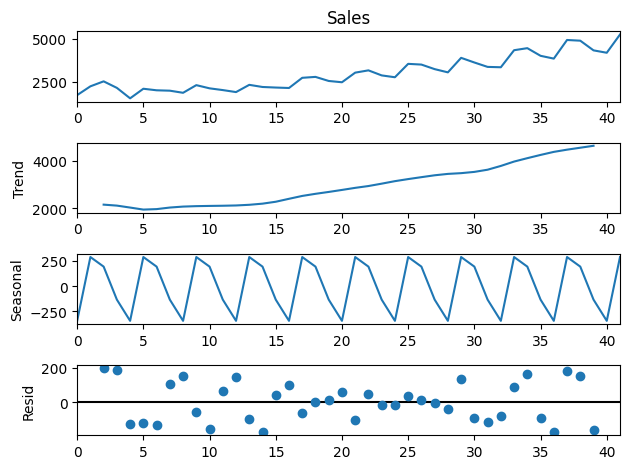

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(data.Sales,period=4)
decompose_ts_add.plot()
plt.show() 

A linearly increasing trend, a seasonal component and considerable noise is also there in the series.

## Splitting the data

In [13]:
Train = data.head(29)
Test = data.tail(13)  

### Linear model

In [14]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2)) 
rmse_linear

799.0289039914887

### Exponential model

In [15]:
Exp = smf.ols('log_sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp 

637.5585943826359

### Quadratic model

In [16]:
Quad = smf.ols('Sales~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad 

508.41681509771456

### Additive seasonality

In [17]:
add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1', 'Q2', 'Q3', 'Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea 

1789.7187326845308

### Additive seasonality linear

In [25]:
add_sea_lin = smf.ols('Sales~t+Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea_lin = pd.Series(add_sea_lin.predict(Test[['Q1', 'Q2', 'Q3', 'Q4','t']]))
rmse_add_sea_lin = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_lin))**2))
rmse_add_sea_lin 

694.1607439484175

### Additive seasonality quadratic

In [24]:
add_sea_Quad = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1', 'Q2', 'Q3', 'Q4','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad 

570.0097034515176

### Multiplicative seasonality

In [21]:
Mul_sea = smf.ols('log_sales~Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea 

1833.3736799128908

### Multiplicative additive seasonality

In [22]:
Mul_Add_sea = smf.ols('log_sales~t+Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

452.3212412010693

### Multiplicative seasonality with quadratic trend

In [33]:
Mul_Add_sea_quad = smf.ols('log_sales~t+t_square+Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_add_sea_quad = pd.Series(Mul_Add_sea_quad.predict(Test))
rmse_Mult_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea_quad)))**2))
rmse_Mult_add_sea_quad

1801.5843693670995

## Comparing the results from all the models

In [34]:
data_rmse = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad", "rmse_add_sea", "rmse_add_sea_lin", "rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea", "rmse_Mult_add_sea_quad"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_lin,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea, rmse_Mult_add_sea_quad])}
table_rmse=pd.DataFrame(data_rmse)
table_rmse.sort_values(['RMSE_Values']) 

,MODEL,RMSE_Values
7,rmse_Mult_add_sea,452.321241
2,rmse_Quad,508.416815
5,rmse_add_sea_quad,570.009703
1,rmse_Exp,637.558594
4,rmse_add_sea_lin,694.160744
0,rmse_linear,799.028904
3,rmse_add_sea,1789.718733
8,rmse_Mult_add_sea_quad,1801.584369
6,rmse_Mult_sea,1833.373680


------------

Among the above models the Multiplicative Additive Seasonality model gave the least error. So it will be used to train on the entire data and then will predict the future data.

## Predicting for the next year

In [40]:
new_data = {'Q3': [0, 0, 1, 0], 'Q4': [0, 0, 0, 1], 'Q1': [1, 0, 0, 0], 'Q2': [0, 1, 0, 0]}
predict_data = pd.DataFrame(new_data)

In [41]:
predict_data

,Q3,Q4,Q1,Q2
0,0,0,1,0
1,0,0,0,1
2,1,0,0,0
3,0,1,0,0


In [42]:
predict_data['t'] = range(43, 47)
predict_data['t_square'] = predict_data['t']*predict_data['t']
predict_data

,Q3,Q4,Q1,Q2,t,t_square
0,0,0,1,0,43,1849
1,0,0,0,1,44,1936
2,1,0,0,0,45,2025
3,0,1,0,0,46,2116


In [43]:
#Build the model on entire data set
model_full = smf.ols('log_sales~t+Q1+Q2+Q3+Q4',data=data).fit() 

In [44]:
pred_new  = pd.Series(model_full.predict(predict_data)) 
pred_new = np.exp(pred_new)
pred_new

0    4248.167745
1    5403.304634
2    5358.004087
3    4945.694818
dtype: float64

In [45]:
predict_data["Forecasted_Sales"] = pd.Series(pred_new)
predict_data

,Q3,Q4,Q1,Q2,t,t_square,Forecasted_Sales
0,0,0,1,0,43,1849,4248.167745
1,0,0,0,1,44,1936,5403.304634
2,1,0,0,0,45,2025,5358.004087
3,0,1,0,0,46,2116,4945.694818


------------------

The model has been trained on the entire dataset and the predictions for the next 4 quarters has been made.